## CHALLENGE

This competition is designed to help you get started with DataCamp Competitions and familiarize yourself with how competitions work. You work at a specialty foods import company that wants to expand into gourmet chocolate bars. Your boss needs your team to research this market to inform your initial approach to potential suppliers. After finding valuable chocolate bar ratings online, you need to explore if the chocolate bars with the highest ratings share any characteristics that could help you narrow your search for suppliers (e.g., cacao percentage, bean country of origin, etc.)

Your challenge
Create a report to summarize your research. Include:

- What is the average rating by country of origin?
- How many bars were reviewed for each of those countries?
- Create plots to visualize findings for questions 1 and 2.
- Is the cacao bean's origin an indicator of quality?
- [Optional] How does cocoa content relate to rating? What is the average cocoa content for bars with higher ratings (above 3.5)?
- [Optional 2] Your research indicates that some consumers want to avoid bars with lecithin. Compare the average rating of bars with and without lecithin (L in the ingredients).
- Summarize your findings.


In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dateutil.parser

#set jupyter to display up to 50 columns, so we can see evrything
pd.set_option('display.max_columns', 50)
pd.set_option('expand_frame_repr', True)



In [2]:
#Importing the dataset
chocolate_data= pd.read_csv("C:\\Users\\dell\\Downloads\\chocolate_bars.csv")
chocolate_data

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00
...,...,...,...,...,...,...,...,...,...,...,...
2525,1205,Zotter,Austria,2014,Blend,Raw,80.0,4.0,"B,S*,C,Sa","waxy, cloying, vegetal",2.75
2526,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.0,"B,S,C","strong nutty, marshmallow",3.75
2527,2036,Zotter,Austria,2018,Blend,"Dry Aged, 30 yr Anniversary bar",75.0,3.0,"B,S,C","fatty, earthy, cocoa",3.00
2528,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.0,"B,S,C","fatty, mild nuts, mild fruit",3.25


In [3]:
chocolate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [4]:
chocolate_data.describe()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
count,2530.000000,2530.000000,2530.000000,2443.000000,2530.000000
mean,1429.800791,2014.374308,71.639723,3.041343,3.196344
std,757.648556,3.968267,5.616724,0.913728,0.445321
min,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,802.000000,2012.000000,70.000000,2.000000,3.000000
50%,1454.000000,2015.000000,70.000000,3.000000,3.250000
75%,2079.000000,2018.000000,74.000000,4.000000,3.500000
max,2712.000000,2021.000000,100.000000,6.000000,4.000000


In [5]:
#Question 1:What is the average rating by country of origin?
chocolate_data.groupby('bean_origin').rating.mean()

bean_origin
Australia    3.250000
Belize       3.233553
Blend        3.038462
Bolivia      3.181250
Brazil       3.262821
               ...   
U.S.A.       3.242424
Uganda       3.065789
Vanuatu      3.115385
Venezuela    3.231225
Vietnam      3.287671
Name: rating, Length: 62, dtype: float64

In [6]:
chocolate_data.groupby('bean_origin').rating.mean().sort_values(ascending=False)

bean_origin
Tobago                   3.625000
China                    3.500000
Sao Tome & Principe      3.500000
Solomon Islands          3.450000
Congo                    3.318182
                           ...   
Sierra Leone             2.750000
St.Vincent-Grenadines    2.750000
Principe                 2.750000
Martinique               2.750000
Puerto Rico              2.714286
Name: rating, Length: 62, dtype: float64

In [7]:
#Question 2:How many bars were reviewed for each of those countries?
chocolate_data.groupby('bean_origin').bar_name.count()

bean_origin
Australia      3
Belize        76
Blend        156
Bolivia       80
Brazil        78
            ... 
U.S.A.        33
Uganda        19
Vanuatu       13
Venezuela    253
Vietnam       73
Name: bar_name, Length: 62, dtype: int64

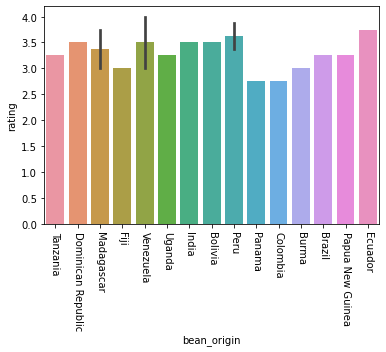

In [8]:
#Question 1 Visualization
viz1=sns.barplot(x ='bean_origin',y = 'rating', data=chocolate_data[0:20])
viz1.set_xticklabels(viz1.get_xticklabels(), rotation= -90);

In [9]:
#To see the Country origin with the highest rating 
y=pd.DataFrame(chocolate_data.groupby('bean_origin').rating.mean().sort_values(ascending=False))
y['bean_origin']= y.index
y

,rating,bean_origin
bean_origin,,
Tobago,3.625000,Tobago
China,3.500000,China
Sao Tome & Principe,3.500000,Sao Tome & Principe
Solomon Islands,3.450000,Solomon Islands
Congo,3.318182,Congo
...,...,...
Sierra Leone,2.750000,Sierra Leone
St.Vincent-Grenadines,2.750000,St.Vincent-Grenadines
Principe,2.750000,Principe


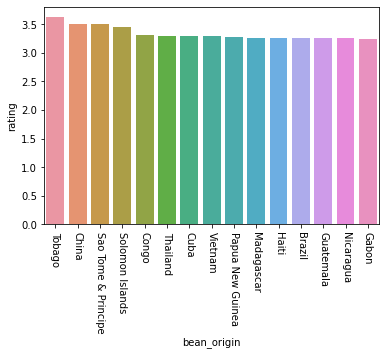

In [10]:
viz1=sns.barplot(x ='bean_origin',y = 'rating', data=y[0:15])
viz1.set_xticklabels(viz1.get_xticklabels(), rotation= -90);

In [11]:
#Question 2 Visualization
chocolate_data.groupby('bean_origin').bar_name.count().sort_values(ascending=False)

bean_origin
Venezuela                253
Peru                     244
Dominican Republic       226
Ecuador                  219
Madagascar               177
                        ... 
Suriname                   1
Sumatra                    1
Sulawesi                   1
St.Vincent-Grenadines      1
Principe                   1
Name: bar_name, Length: 62, dtype: int64

In [12]:
x=pd.DataFrame(chocolate_data.groupby('bean_origin').bar_name.count().sort_values(ascending=False))
x['bean_origin']= x.index
x

,bar_name,bean_origin
bean_origin,,
Venezuela,253,Venezuela
Peru,244,Peru
Dominican Republic,226,Dominican Republic
Ecuador,219,Ecuador
Madagascar,177,Madagascar
...,...,...
Suriname,1,Suriname
Sumatra,1,Sumatra
Sulawesi,1,Sulawesi


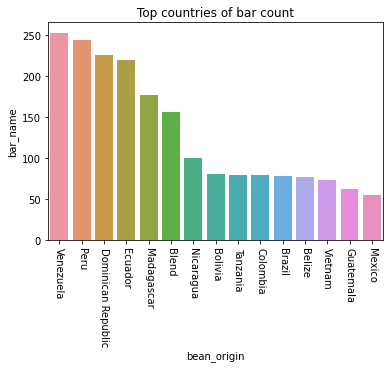

In [13]:
viz2=sns.barplot(x ='bean_origin',y = 'bar_name', data=x[0:15])
viz2.set_title('Top countries of bar count')
viz2.set_xticklabels(viz2.get_xticklabels(), rotation= -90);

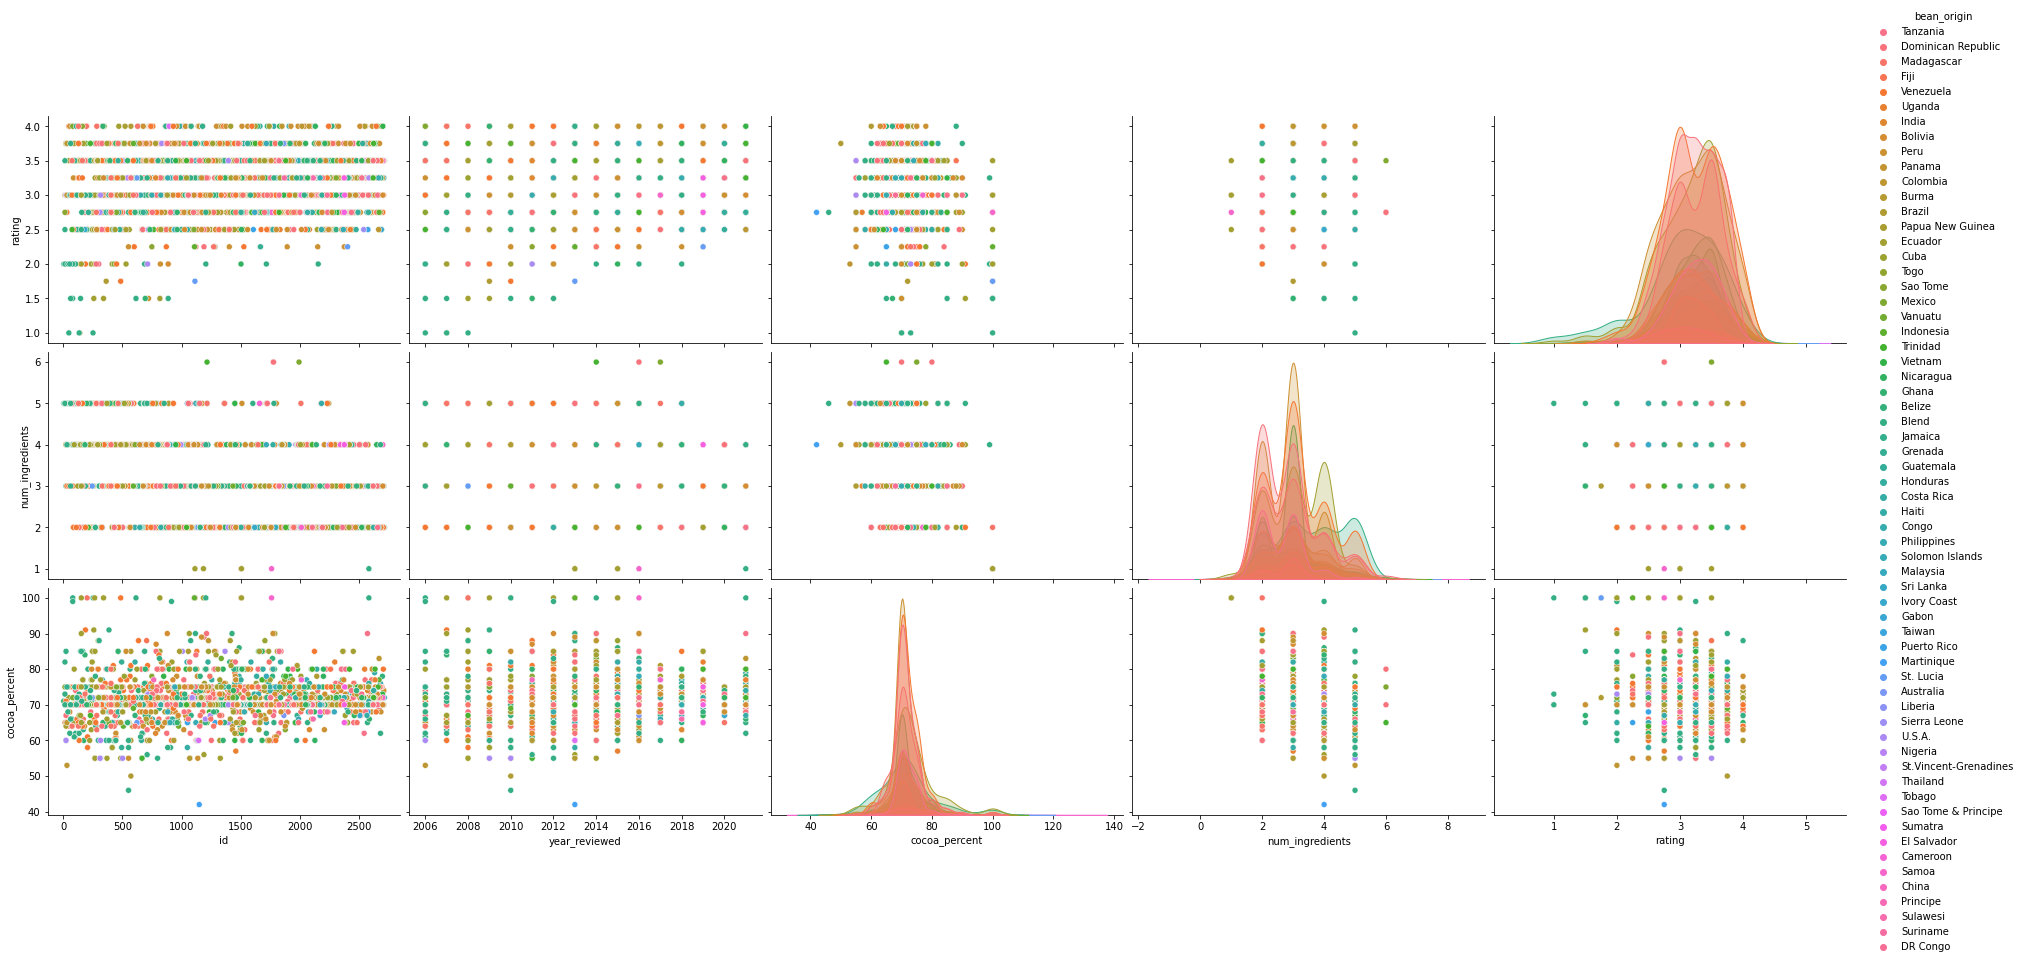

In [14]:
#Question 4:Is the cocoa bean origin an indicator of the quality
sns.pairplot(chocolate_data,hue='bean_origin',y_vars=['rating','num_ingredients','cocoa_percent'],height=3.5,aspect=1.5) 

In [15]:
chocolate_data.groupby('bean_origin').rating.max().sort_values

<bound method Series.sort_values of bean_origin
Australia    3.75
Belize       4.00
Blend        4.00
Bolivia      4.00
Brazil       4.00
             ... 
U.S.A.       3.75
Uganda       3.75
Vanuatu      3.75
Venezuela    4.00
Vietnam      4.00
Name: rating, Length: 62, dtype: float64>

Text(0.5, 1.0, 'Relationship between cocoa content and rating')

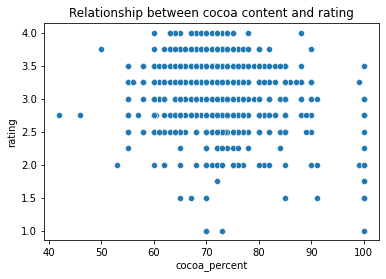

In [16]:
#Optional 1:How does cocoa content relate to rating?
viz3=sns.scatterplot(x=chocolate_data.cocoa_percent, y=chocolate_data.rating)
viz3.set_title('Relationship between cocoa content and rating')
#Insight:This data does not show any relationship between the cocoa content and the rating

In [17]:
#What is the average cocoa content for bars with higher rating(above 3.5)
rat=chocolate_data[chocolate_data['rating']>3.5].cocoa_percent.mean()
rat

70.94781553398059

In [18]:
#Optional 2:Average rating of bars with or without Lecithin
#With lecithin
chocolate_data['ingredients']

0           B,S,C
1           B,S,C
2           B,S,C
3           B,S,C
4           B,S,C
          ...    
2525    B,S*,C,Sa
2526        B,S,C
2527        B,S,C
2528        B,S,C
2529        B,S,C
Name: ingredients, Length: 2530, dtype: object

In [19]:
lecithin_bar =['L']
choc_data= chocolate_data.dropna(axis=0)
average_lecithin = choc_data[choc_data['ingredients'].str.contains('L')].rating.mean()
print('The average rating of bars with lecithin is:', average_lecithin)#average rating for bars containing lecithin

ave_no_lecithin = choc_data[~choc_data['ingredients'].str.contains('L')].rating.mean()
print('The average rating of bars without lecithin is:', ave_no_lecithin)#average rating for bars that do not contain lecithin

The average rating of bars with lecithin is: 3.150608519269777
The average rating of bars without lecithin is: 3.2251282051282053


### Summary
##### From the Exploratory analysis of this dataset, it can be deduced that:
1. The review was taken between the years 2006 and 2021
2. The average rating of the bars is approximately 3.2
3. Some of the countries with the highest number of bars reviewed include:Venezuela,Peru,Dominican Republic,Ecuador and Madagascar
4. There is no relationship between the cocoa content and ratings
5. The average rating of bars without lecithin is higher than those with lecithin
6. The cocoa bean origin is not necessarily an indicator of quality;from the pairplots we can see that there is no correlation between the bean origin and the features(rating, number of ingredient, cocoa percentage) that can indicate quality.
